# Imports

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML
import seaborn as sns
import optuna

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ignora avisos de depreciação específicos
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


import logging

# Definir o nível de log para WARNING
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Helper Functions

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def report_classification(y_true, y_pred, model):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {'Model': model, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'f1-Score': f1 }



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [12]:
# Dados de Treinamento
X_train = pd.read_csv('../../data/Classificacao/X_training.csv')
y_train = pd.read_csv('../../data/Classificacao/y_training.csv').values.ravel()

# Dados de Test
X_test = pd.read_csv('../../data/Classificacao/X_test.csv')
y_test = pd.read_csv('../../data/Classificacao/y_test.csv').values.ravel()

# Dados de Validacao
X_val = pd.read_csv('../../data/Classificacao/X_validation.csv')
y_val = pd.read_csv('../../data/Classificacao/y_validation.csv').values.ravel()

In [13]:
# X_train = X_train.drop(columns=['id'])
# X_test = X_test.drop(columns=['id'])
# X_val = X_val.drop(columns=['id'])

In [14]:
X_train.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,1.0,0.25,0.6,0.6,0.6,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,0.8,0.50,0.6,0.4,0.8,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,0.6,1.00,1.0,0.4,0.4,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,1.0,0.00,0.4,0.4,0.6,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,0.2,0.50,0.6,1.0,0.6,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


# Machine Learning Models

## KNN

In [15]:
# neigh = np.arange(1,10,1)
# results = []
# knn_results = pd.DataFrame()
# for k in range(1,10,2):
# #         # Model Definition
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
        
#     # Model Train
#     #knn.fit(X_train, y_train)
#     knn.fit(np.array(X_train), np.array(y_train))

#     #knn.fit(X_train, y_train)
#     y_pred = knn.predict(np.array(X_val))
#     report = report_classification(y_val, y_pred)

    
    
#     results.append({
#              'n_neighbors': k,
#              'Accuracy': report['Accuracy'],
#              'Precision': report['Precision'],
#              'Recall': report['Recall'],
#              'f1-Score': report['f1-Score'],
#              'Dataset': 'Val'
#          })
    
#     df_aux = pd.DataFrame(results)
#     knn_results = pd.concat([knn_results, df_aux], axis=0).drop_duplicates()



In [16]:
# for k in range(1,10,2):
# # #         # Model Definition
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
        
# #     # Model Train
#     knn.fit(X_train, y_train)

# #     #knn.fit(X_train, y_train)
#     y_pred = knn.predict(np.array(X_val))
#     report = report_classification(y_val, y_pred, 'KNN')

In [17]:
# pd.DataFrame([report])


In [18]:
def knn_fine_tuning(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1,10)

    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs=-1 )
    knn_model.fit(np.array(X_train), np.array(y_train))

    y_pred = knn_model.predict(np.array(X_val))

    return precision_score(y_val, y_pred)

In [19]:
study = optuna.create_study(direction='maximize')
study.optimize(knn_fine_tuning, n_trials=20)

In [20]:
optuna.visualization.plot_optimization_history(study)

In [21]:
knn_best_params = study.best_params
knn_best_params

{'n_neighbors': 2}

In [22]:
# dataset_types = np.unique(df_all_knn['Dataset'])
# cont = 0
# for i in dataset_types:
#     cont += 1
#     subset = df_all_knn.loc[df_all_knn['Dataset'] == i]
    
#     plt.subplot(1,3, cont)
#     plt.plot(subset['n_neighbors'],subset['Accuracy'], label='Acurácia')
#     plt.plot(subset['n_neighbors'],subset['Precision'], label='Precisão')
#     plt.plot(subset['n_neighbors'],subset['Recall'], label='Recall')
#     plt.plot(subset['n_neighbors'],subset['f1-Score'], label='F1-Score')
#     plt.title('Algoritmo KNN: Métricas no conjunto de dados de '+ i)
#     plt.legend()
#     #for indices, linha in df_all_knn.iterrows():



## Random Forest

In [23]:
def rf_fine_tuning(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 30)
    max_depth = trial.suggest_int('max_depth', 5, 30)

    rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    return f1_score(y_val, y_pred)

In [24]:
study = optuna.create_study(direction='maximize')
study.optimize(rf_fine_tuning, n_trials=100)

In [25]:
optuna.visualization.plot_optimization_history(study)

In [26]:
rf_best_params = study.best_params
rf_best_params

{'n_estimators': 30, 'max_depth': 25}

## Decision Tree

In [27]:
results = []
dt_results = pd.DataFrame()
for i in range(1,50,2):
    dt_model = DecisionTreeClassifier(max_depth = i)

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_val)

    report = report_classification(y_val, y_pred, 'Decision Tree')

    results.append({
        'max_depth': i,
        'Accuracy': report['Accuracy'],
        'Precision': report['Precision'],
        'Recall': report['Recall'],
        'f1-Score': report['f1-Score'],
        'Dataset': 'Val'
    })

    df_aux = pd.DataFrame(results)
    dt_results = pd.concat([dt_results, df_aux], axis=0).drop_duplicates()

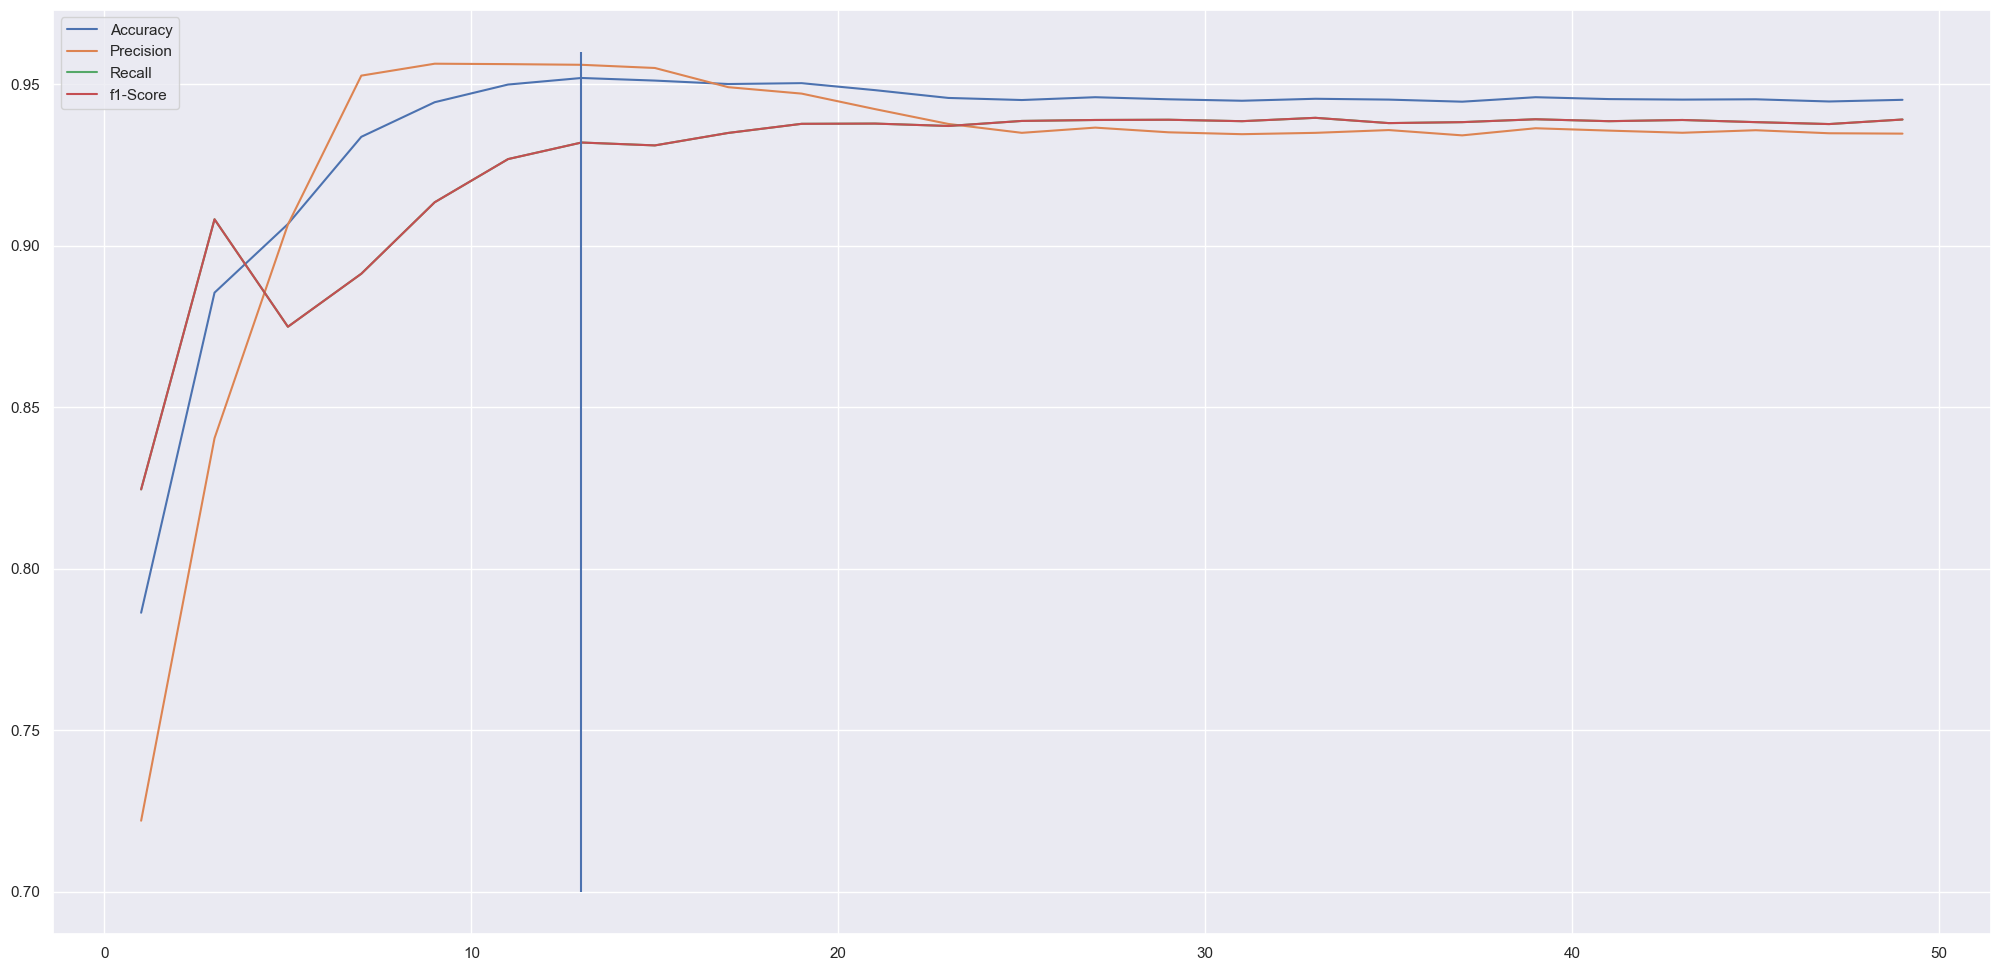

In [28]:
plt.plot(dt_results['max_depth'],dt_results['Accuracy'], label = 'Accuracy' )
plt.plot(dt_results['max_depth'],dt_results['Precision'], label = 'Precision' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'Recall' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'f1-Score' )
plt.legend()

best_max_depth = int(dt_results['max_depth'].loc[dt_results['f1-Score'] ==  dt_results['f1-Score'].max()])
plt.vlines(best_max_depth, ymin = 0.7, ymax=0.96)


## Logistic Regression

In [29]:
def lr_fine_tuning(trial):
    c = trial.suggest_int('C', 1, 3)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 10, 300)
    #max_depth = trial.suggest_int('max_depth', 5, 30)

    lr_model = LogisticRegression(C = c, solver=solver, max_iter= max_iter)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_val)

    return f1_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(lr_fine_tuning, n_trials=50)

In [30]:
optuna.visualization.plot_optimization_history(study)

In [31]:
lr_best_param = study.best_params
lr_best_param

{'C': 3, 'solver': 'newton-cholesky', 'max_iter': 110}

# All Results

In [32]:
knn_final = KNeighborsClassifier(n_neighbors = knn_best_params['n_neighbors'], n_jobs=-1 )
rf_final = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'])
dt_final = DecisionTreeClassifier(max_depth = best_max_depth)
lr_final = LogisticRegression(C = lr_best_param['C'], solver=lr_best_param['solver'], max_iter= lr_best_param['max_iter'])

In [33]:
knn_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
dt_final.fit(X_train, y_train)
lr_final.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=110, solver='newton-cholesky')

In [34]:
model_list = [knn_final, rf_final, dt_final, lr_final]
model_names = ['KNN', 'Random Forest', 'Decision Tree', 'Logistic Regression']

# Nos dados de Treinamento
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()
val_dataset = pd.DataFrame()

In [35]:
for model, model_name in zip(model_list, model_names):
    y_pred = model.predict(np.array(X_train))
    results = report_classification(y_train, y_pred, model_name)
    train_dataset = pd.concat([train_dataset, pd.DataFrame([results])])
train_dataset['Dataset'] = 'Train'
train_dataset

,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999297,0.999873,0.998505,0.999188,Train
0,Decision Tree,0.970834,0.977613,0.954563,0.965950,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train


In [36]:
# Nos dados de Validation
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_val))
    results = report_classification(y_val, y_pred, model_name)
    val_dataset = pd.concat([val_dataset, pd.DataFrame([results])])
val_dataset['Dataset'] = 'Validation'
val_dataset

KNN
Random Forest
Decision Tree
Logistic Regression


,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.661283,0.683921,0.406118,0.509619,Validation
0,Random Forest,0.963577,0.972646,0.942460,0.957315,Validation
0,Decision Tree,0.952186,0.956078,0.932512,0.944148,Validation
0,Logistic Regression,0.874739,0.869730,0.836216,0.852644,Validation


In [37]:
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_test))
    results = report_classification(y_test, y_pred, model_name)
    test_dataset = pd.concat([test_dataset, pd.DataFrame([results])])
test_dataset['Dataset'] = 'Test'
test_dataset

KNN
Random Forest
Decision Tree
Logistic Regression


,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.657900,0.689379,0.401496,0.507451,Test
0,Random Forest,0.962229,0.970639,0.942455,0.956339,Test
0,Decision Tree,0.951840,0.953803,0.935592,0.944610,Test
0,Logistic Regression,0.871626,0.867942,0.834492,0.850888,Test


# Join Results

In [38]:
full_results = pd.concat([train_dataset, val_dataset, test_dataset])
full_results

,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999297,0.999873,0.998505,0.999188,Train
0,Decision Tree,0.970834,0.977613,0.954563,0.965950,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train
0,KNN,0.661283,0.683921,0.406118,0.509619,Validation
0,Random Forest,0.963577,0.972646,0.942460,0.957315,Validation
0,Decision Tree,0.952186,0.956078,0.932512,0.944148,Validation
0,Logistic Regression,0.874739,0.869730,0.836216,0.852644,Validation
0,KNN,0.657900,0.689379,0.401496,0.507451,Test
0,Random Forest,0.962229,0.970639,0.942455,0.956339,Test


# Comparing Performance

In [39]:
list_datasets = np.unique(full_results['Dataset'])
for i in list_datasets:
    subset = full_results.loc[full_results['Dataset'] == i]
    
    

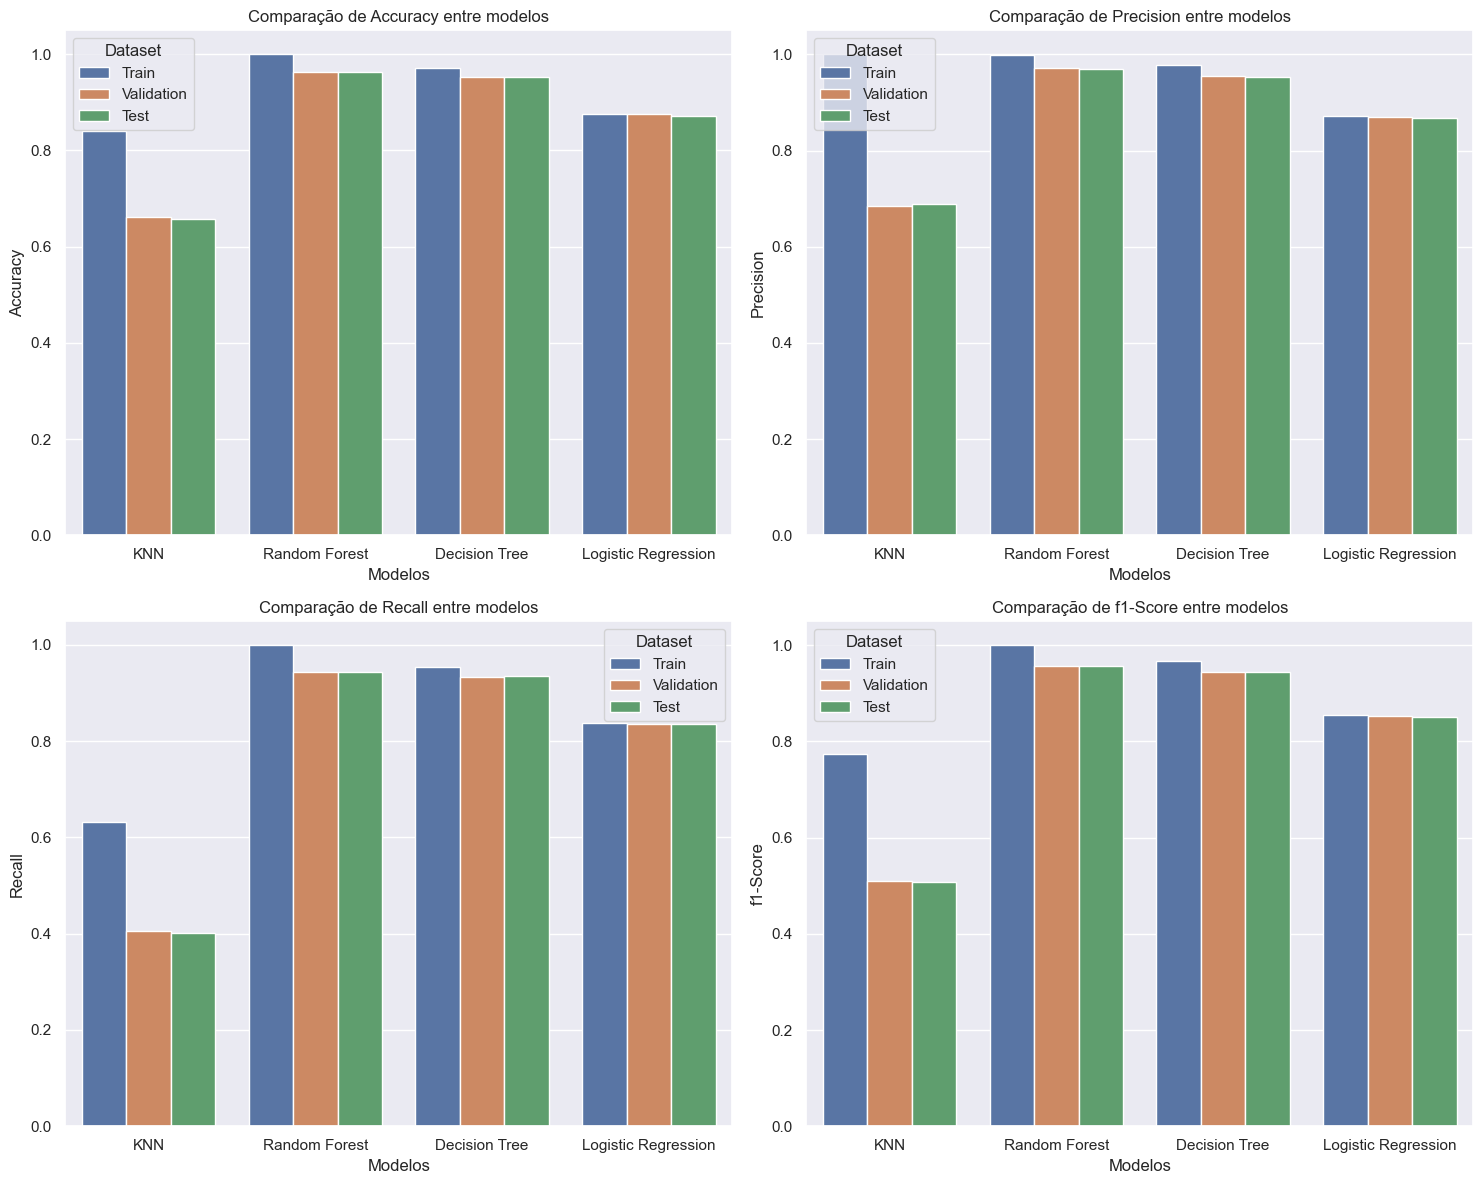

In [45]:
# Criar subplots de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

metrics = ["Accuracy", "Precision", "Recall", "f1-Score"]
for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x="Model", y=metric, hue="Dataset", data=full_results, ax=ax)
    ax.set_title(f'Comparação de {metric} entre modelos')
    ax.set_ylabel(metric)
    ax.set_xlabel("Modelos")

plt.tight_layout()
plt.savefig("comparacao_classifier2.png")
plt.show()

